In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [24]:
csv_path = r'merged.csv'

df = pd.read_csv(csv_path)

In [25]:
print(df.columns)

Index(['time', 'traffic_light', 'Real Tons', 'Bin Level', 'Bond Work Index',
       'Deep Work Index', 'Sedimentation Rate', 'Abrasiveness Index',
       'Copper Grade', 'Soluble Copper Grade', 'Py', 'Iron', 'Arsenic', 'Mo',
       'Kao', 'Piro', 'Cp', 'Bn', 'Ill', 'Mus', 'Sulfide', 'PH',
       'Copper Recovery', 'feeder 1st Motor', 'feeder 2st Motor'],
      dtype='object')


In [26]:
list_trafficlight = df['traffic_light'].tolist()
print(len(list_trafficlight))
points = []
segments = 0
for idx, _ in enumerate(list_trafficlight):
    try:
        if list_trafficlight[idx+1]>list_trafficlight[idx]:
            points.append(idx)
            segments += 1
    except IndexError:
        continue
print(segments)

1036720
4946


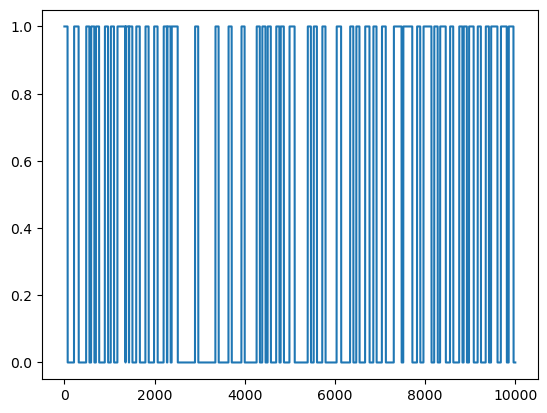

In [29]:
plt.plot(list_trafficlight[0:10000])

In [38]:
Material = df.filter(items = ['Bond Work Index',
       'Deep Work Index', 'Sedimentation Rate', 'Abrasiveness Index',
       'Copper Grade', 'Soluble Copper Grade', 'Py', 'Iron', 'Arsenic', 'Mo',
       'Kao', 'Piro', 'Cp', 'Bn', 'Ill', 'Mus', 'Sulfide', 'PH',
       'Copper Recovery'])  # Replace 'target_column' with the column name if applicable

# Standardize the features
scaler = StandardScaler()
Material_scaled = scaler.fit_transform(Material)


In [39]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(Material_scaled)

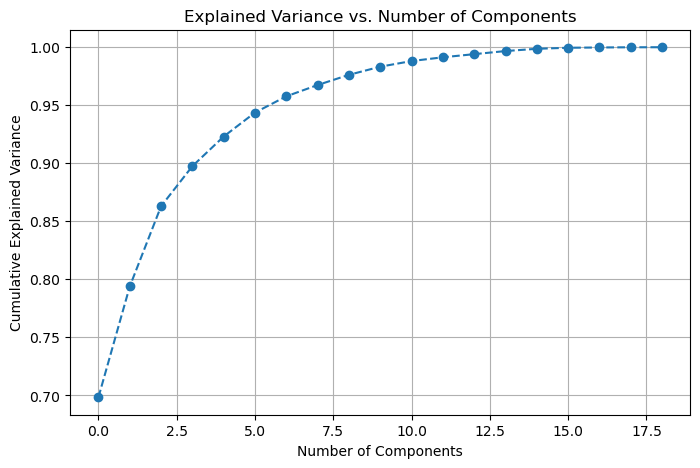

In [40]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [45]:
# Choose the number of components (e.g., 95% variance)
n_components = sum(cumulative_variance <= 0.95) + 1
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(Material_scaled)

# Print the shape of the reduced dataset
print(f"Original shape: {Material.shape}")
print(f"Reduced shape: {X_reduced.shape}")
print(type(X_reduced))

Original shape: (1036720, 19)
Reduced shape: (1036720, 7)
<class 'numpy.ndarray'>


In [ ]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 50  # Example sequence length
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')